# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np++
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    cite= url+city
    city_url = f'{cite}&appid={weather_api_key}&units=metric'
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

     # Add 1 to the record count
    record_count += 1
    # Run an API request for each city
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the city information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })
    

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | maceio
Processing Record 2 of Set 1 | yigo village
Processing Record 3 of Set 1 | revda
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | klyuchi
Processing Record 8 of Set 1 | laguna
Processing Record 9 of Set 1 | wailua homesteads
Processing Record 10 of Set 1 | mejit
Processing Record 11 of Set 1 | ancud
Processing Record 12 of Set 1 | sena madureira
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | sambava
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | kedougou
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | masinloc
Processing Record 20 of Set 1 | tura
Processing Record 21 of Set 1 | coquimbo
Processing Record 22 of Set 1 | yellowknife
Processing Record 23 of Set 1 | 

In [23]:
# Convert the city_data into a pandas DataFrame for further analysis
city_weather_df = pd.DataFrame(city_data)

# Show Record Count
city_weather_df.count()
   

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [24]:
# Display the first few rows of the DataFrame
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,maceio,-9.6658,-35.7353,28.69,74,40,6.17,BR,1727527111
1,yigo village,13.5361,144.8886,27.62,87,75,2.06,GU,1727527113
2,revda,56.8010,59.9303,13.16,50,100,5.43,RU,1727527115
3,grytviken,-54.2811,-36.5092,2.10,92,100,6.40,GS,1727527117
4,bethel,41.3712,-73.4140,18.62,85,100,1.54,US,1727527119


In [25]:
# Export the City_Data into a csv
city_weather_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,maceio,-9.6658,-35.7353,28.69,74,40,6.17,BR,1727527111
1,yigo village,13.5361,144.8886,27.62,87,75,2.06,GU,1727527113
2,revda,56.8010,59.9303,13.16,50,100,5.43,RU,1727527115
3,grytviken,-54.2811,-36.5092,2.10,92,100,6.40,GS,1727527117
4,bethel,41.3712,-73.4140,18.62,85,100,1.54,US,1727527119


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

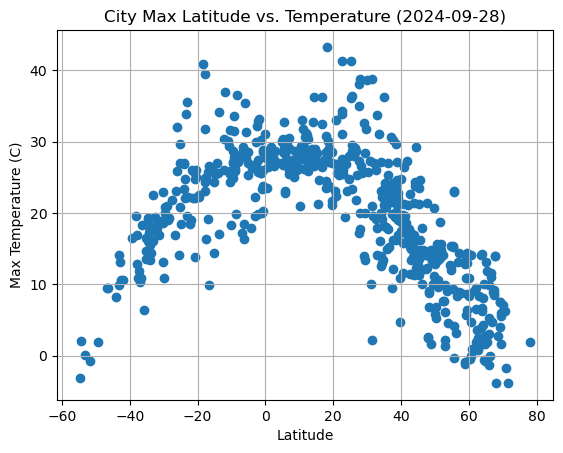

In [28]:
# Build scatter plot for latitude vs. temperature
latitude= city_data_df['Lat']
temprature=city_data_df['Max Temp']

plt.scatter(latitude,temprature, marker='o',)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f"City Max Latitude vs. Temperature (2024-09-28)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

plt.show()


#### Latitude Vs. Humidity

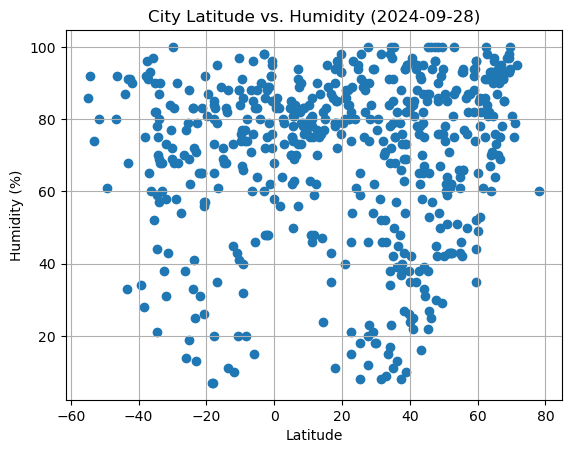

In [29]:
# Build scatter plot for latitude vs. temperature
latitude= city_data_df['Lat']
humidity=city_data_df['Humidity']

plt.scatter(latitude,humidity, marker='o',)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity (2024-09-28)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

plt.show()

#### Latitude Vs. Cloudiness

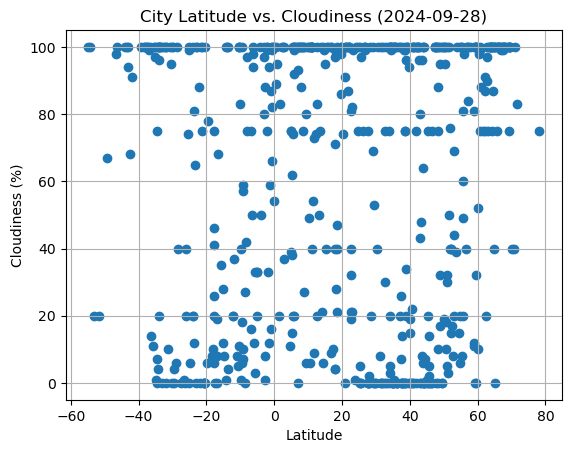

In [30]:
# Build the scatter plots for latitude vs. cloudiness
latitude= city_data_df['Lat']
cloudiness=city_data_df['Cloudiness']

plt.scatter(latitude,cloudiness, marker='o',)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness (2024-09-28)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

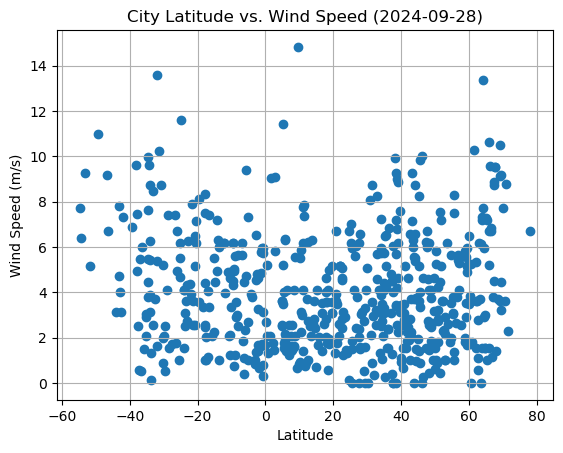

In [31]:
# Build the scatter plots for latitude vs. wind spee
latitude= city_data_df['Lat']
windspeed=city_data_df['Wind Speed']

plt.scatter(latitude,windspeed, marker='o',)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f"City Latitude vs. Wind Speed (2024-09-28)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
slope, intercept, r_value, p_value, std_err = linregress(latitude, temprature)

In [13]:
# Extracting the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yigo village,13.5361,144.8886,27.62,87,75,2.06,GU,1727527113
2,revda,56.8010,59.9303,13.16,50,100,5.43,RU,1727527115
4,bethel,41.3712,-73.4140,18.62,85,100,1.54,US,1727527119
5,ribeira grande,38.5167,-28.7000,23.76,94,75,7.20,PT,1727527121
6,klyuchi,52.2667,79.1667,7.60,43,15,2.28,RU,1727527123


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,maceio,-9.6658,-35.7353,28.69,74,40,6.17,BR,1727527111
3,grytviken,-54.2811,-36.5092,2.10,92,100,6.40,GS,1727527117
10,ancud,-41.8697,-73.8203,10.54,90,91,7.33,CL,1727527131
11,sena madureira,-9.0656,-68.6569,25.90,66,59,1.22,BR,1727527133
12,margaret river,-33.9500,115.0667,13.41,57,96,5.42,AU,1727527135


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: -0.8156135798681461


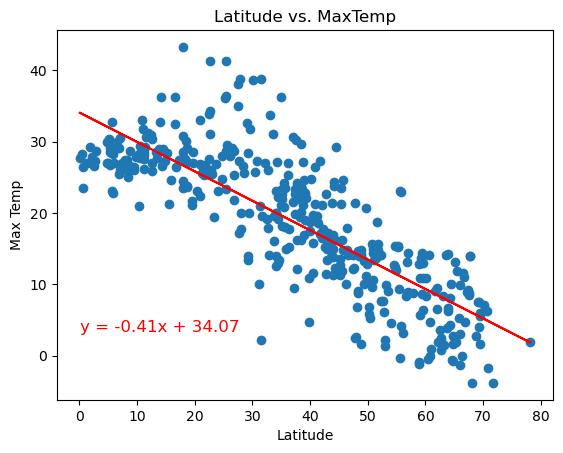

In [51]:
# Linear regression on Northern Hemisphere
import scipy.stats as st
latnorth= northern_hemi_df['Lat']
tempnorth= northern_hemi_df['Max Temp']

# correlation coefficient
#pearson_corr, p_value = st.pearsonr(latnorth,tempnorth)
pearson_corr, p_value = st.pearsonr(tempnorth,latnorth)
print(f"The r^2-value is: {pearson_corr}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(latnorth,tempnorth)

# The regression line
regress_values = slope * latnorth + intercept
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'


plt.scatter(latnorth,tempnorth, marker='o')
#plt.scatter(temprature,latitude, marker='o')
plt.plot(latnorth, regress_values, color='red')

# Incorporate the other graph properties
plt.text(min(latnorth), max(tempnorth)-40, equation_text, fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f"Latitude vs. MaxTemp")
plt.show()


The r^2-value is: 0.7277573607154406


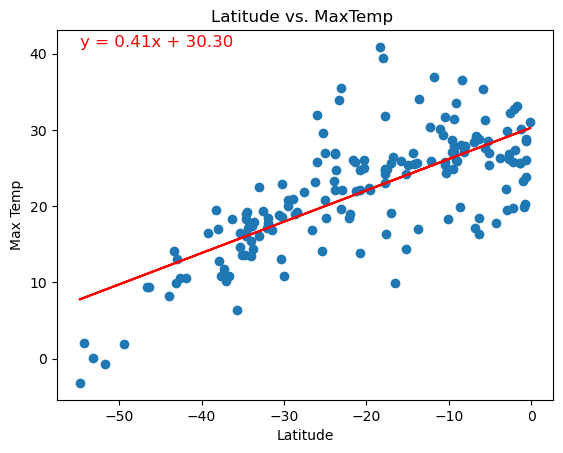

In [54]:
# Linear regression on Northern Hemisphere
latsouth= southern_hemi_df['Lat']
tempsouth= southern_hemi_df['Max Temp']

# correlation coefficient
pearson_corr, p_value = st.pearsonr(tempsouth,latsouth)
print(f"The r^2-value is: {pearson_corr}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(latsouth,tempsouth)

# The regression line
regress_values = slope * latsouth + intercept
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'


plt.scatter(latsouth,tempsouth, marker='o')
#plt.scatter(temprature,latitude, marker='o')
plt.plot(latsouth, regress_values, color='red')

# Incorporate the other graph properties
plt.text(min(latsouth), max(tempsouth), equation_text, fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f"Latitude vs. MaxTemp ")

plt.show()


# Discussion about the linear relationship: YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.06886310626256371


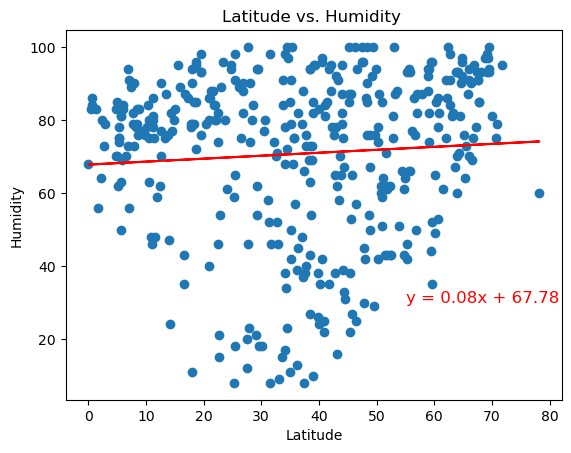

In [62]:
latnorth= northern_hemi_df['Lat']
tempnorth= northern_hemi_df['Humidity']

# correlation coefficient
pearson_corr, p_value = st.pearsonr(latnorth,tempnorth)
print(f"The r^2-value is: {pearson_corr}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(latnorth,tempnorth)

# The regression line
regress_values = slope * latnorth + intercept
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'


plt.scatter(latnorth,tempnorth, marker='o')
#plt.scatter(temprature,latitude, marker='o')
plt.plot(latnorth, regress_values, color='red')

# Incorporate the other graph properties
plt.text(min(latnorth)+55, max(tempnorth)-70, equation_text, fontsize=12, color='red')

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f"Latitude vs. Humidity ")

plt.show()

The r^2-value is: 0.010047304998049369


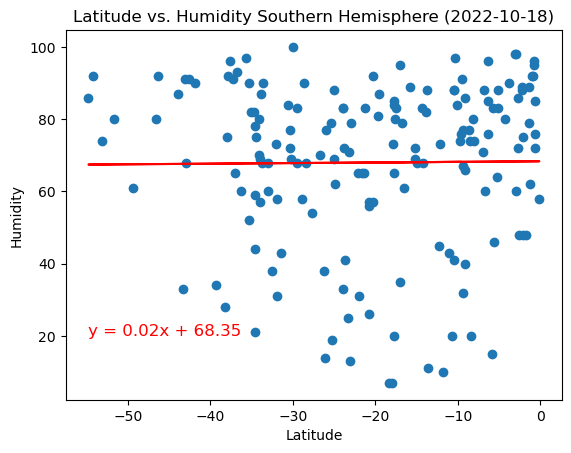

In [64]:
# Southern Hemisphere
latnorth= southern_hemi_df['Lat']
tempnorth= southern_hemi_df['Humidity']

# correlation coefficient
pearson_corr, p_value = st.pearsonr(latnorth,tempnorth)
print(f"The r^2-value is: {pearson_corr}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(latnorth,tempnorth)

# The regression line
regress_values = slope * latnorth + intercept
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'


plt.scatter(latnorth,tempnorth, marker='o')
#plt.scatter(temprature,latitude, marker='o')
plt.plot(latnorth, regress_values, color='red')

# Incorporate the other graph properties
plt.text(min(latnorth), max(tempnorth)-80, equation_text, fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f"Latitude vs. Humidity Southern Hemisphere (2022-10-18)")

plt.show()

# Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.03117849723560492


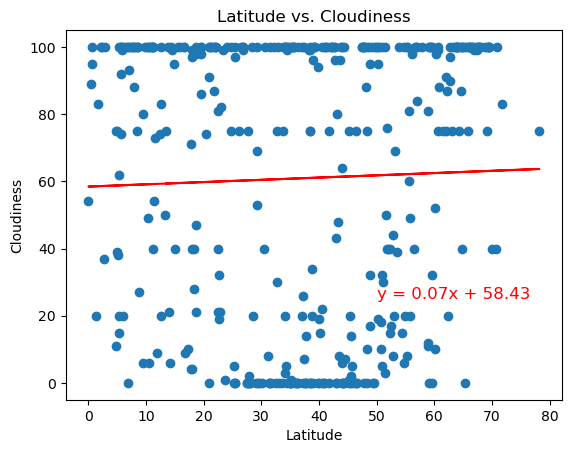

In [70]:
# Northern Hemisphere
latnorth= northern_hemi_df['Lat']
tempnorth= northern_hemi_df['Cloudiness']

# correlation coefficient
pearson_corr, p_value = st.pearsonr(latnorth,tempnorth)
print(f"The r^2-value is: {pearson_corr}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(latnorth,tempnorth)

# The regression line
regress_values = slope * latnorth + intercept
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'


plt.scatter(latnorth,tempnorth, marker='o')
#plt.scatter(temprature,latitude, marker='o')
plt.plot(latnorth, regress_values, color='red')

# Incorporate the other graph properties
plt.text(min(latnorth)+50, max(tempnorth)-75, equation_text, fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f"Latitude vs. Cloudiness")

plt.show()

The r^2-value is: -0.1424968077414457


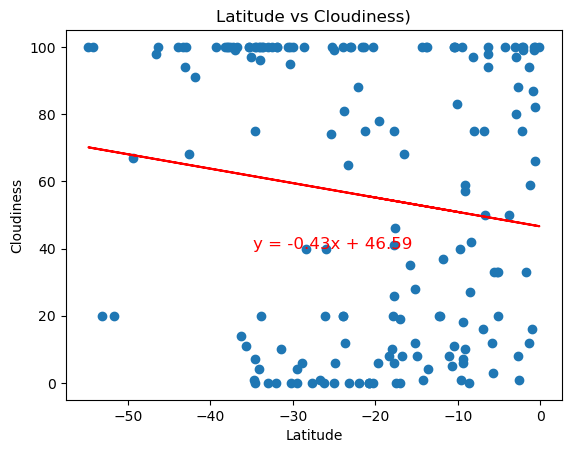

In [74]:
# Southern Hemisphere
latnorth= southern_hemi_df['Lat']
tempnorth= southern_hemi_df['Cloudiness']

# correlation coefficient
pearson_corr, p_value = st.pearsonr(latnorth,tempnorth)
print(f"The r^2-value is: {pearson_corr}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(latnorth,tempnorth)

# The regression line
regress_values = slope * latnorth + intercept
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'


plt.scatter(latnorth,tempnorth, marker='o')
#plt.scatter(temprature,latitude, marker='o')
plt.plot(latnorth, regress_values, color='red')

# Incorporate the other graph properties
plt.text(min(latnorth)+20, max(tempnorth)-60, equation_text, fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f"Latitude vs Cloudiness)")

plt.show()

# Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.17981389094422234


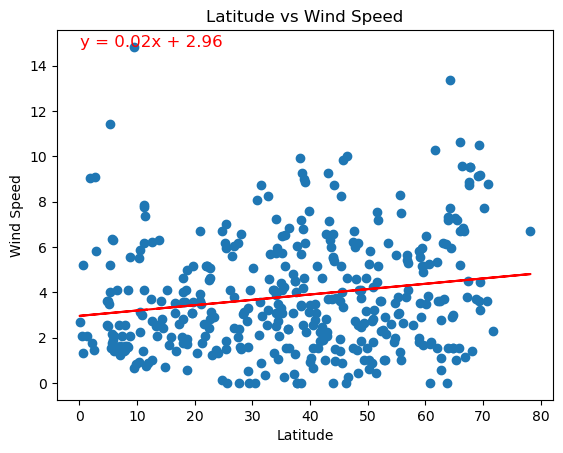

In [75]:
# Northern Hemisphere
latnorth= northern_hemi_df['Lat']
tempnorth= northern_hemi_df['Wind Speed']

# correlation coefficient
pearson_corr, p_value = st.pearsonr(latnorth,tempnorth)
print(f"The r^2-value is: {pearson_corr}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(latnorth,tempnorth)

# The regression line
regress_values = slope * latnorth + intercept
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'


plt.scatter(latnorth,tempnorth, marker='o')
#plt.scatter(temprature,latitude, marker='o')
plt.plot(latnorth, regress_values, color='red')

# Incorporate the other graph properties
plt.text(min(latnorth), max(tempnorth), equation_text, fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f"Latitude vs Wind Speed")

plt.show()

The r^2-value is: -0.2997666908085096


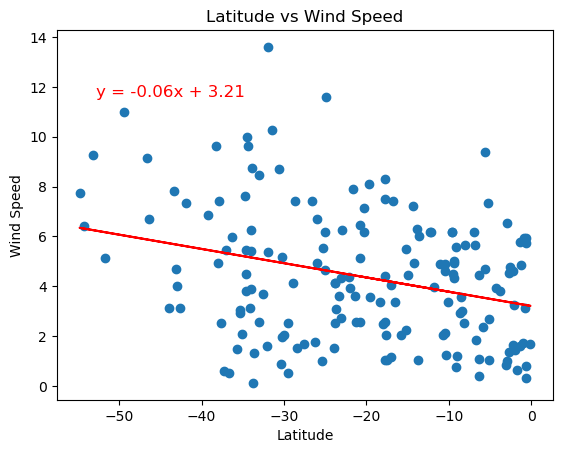

In [80]:
# Southern Hemisphere
latnorth= southern_hemi_df['Lat']
tempnorth= southern_hemi_df['Wind Speed']

# correlation coefficient
pearson_corr, p_value = st.pearsonr(latnorth,tempnorth)
print(f"The r^2-value is: {pearson_corr}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(latnorth,tempnorth)

# The regression line
regress_values = slope * latnorth + intercept
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'


plt.scatter(latnorth,tempnorth, marker='o')
#plt.scatter(temprature,latitude, marker='o')
plt.plot(latnorth, regress_values, color='red')

# Incorporate the other graph properties
plt.text(min(latnorth)+2, max(tempnorth)-2, equation_text, fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f"Latitude vs Wind Speed")

plt.show()

# Discussion about the linear relationship:** YOUR RESPONSE HERE